In [3]:
#importing libraries
import csv
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
import math
from sklearn import preprocessing
from sklearn.cluster import KMeans,SpectralClustering
import warnings
import datetime
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [52]:
#loading the dataset
my_data = pd.read_csv("data.csv")
my_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


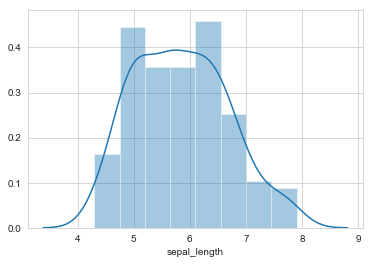

In [37]:
sns.distplot(my_data["sepal_length"])

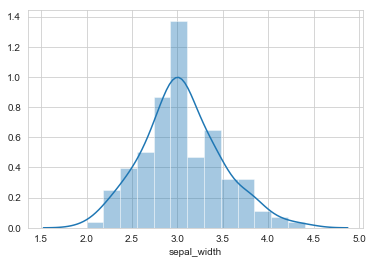

In [14]:
sns.distplot(my_data["sepal_width"])

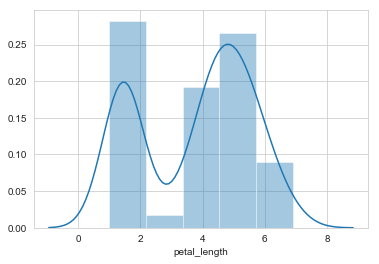

In [15]:
sns.distplot(my_data["petal_length"])

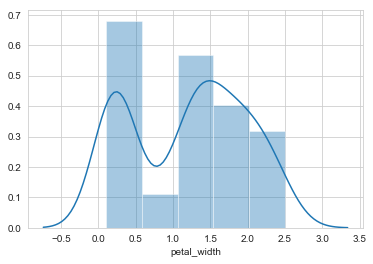

In [17]:
sns.distplot(my_data["petal_width"])

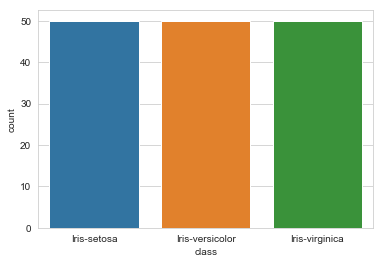

In [18]:
sns.countplot(data=my_data, x="class")

In [88]:
#turning textual data to numerical
from sklearn.preprocessing import LabelEncoder
arr_data = my_data.values

labelencoder_6 = LabelEncoder() #dependent (target) variable encoder
arr_data[:,-1] = labelencoder_6.fit_transform(arr_data[:,-1])

X = arr_data[:,:-1]
y = arr_data[:,-1]

In [67]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNeighborsClassifier Accuracy: ")
print(metrics.accuracy_score(y_test, y_pred))



KNeighborsClassifier Accuracy: 
0.9736842105263158


In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(arr_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
labels = kmeans.predict(arr_data)
centroids = kmeans.cluster_centers_
centroids

array([[6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.418     , 1.464     , 0.244     , 0.        ]])

In [81]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

# plt.scatter(arr_data['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

NameError: name 'colmap' is not defined

<Figure size 360x360 with 0 Axes>

In [98]:
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
avg_error = 0 
for train_index, test_index in kf.split(X):
#     print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]    
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_test)
    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    # Print out the mean absolute error (mae)
#     print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    avg_error += round(np.mean(errors), 2)
print("avg error: ", round(avg_error/50, 2))

avg error:  0.05


In [93]:
from sklearn.cross_validation import cross_val_score

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [94]:
predictions

array([1.   , 0.   , 1.997, 1.004, 1.134, 0.   , 1.   , 1.983, 1.062,
       1.   , 1.973, 0.   , 0.   , 0.   , 0.   , 1.023, 2.   , 1.   ,
       1.   , 2.   , 0.   , 1.917, 0.   , 2.   , 1.999, 1.997, 1.991,
       2.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 1.965,
       1.   , 0.   ])

In [105]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [107]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

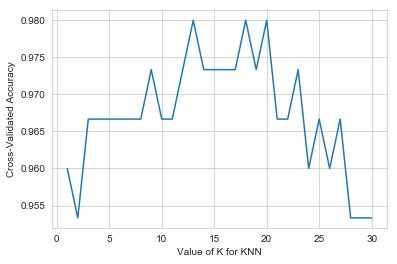

In [108]:
import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [109]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [111]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


In [112]:
# ## Cross-validation example: feature selection

# **Goal**: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [118]:
#read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)


# create a Python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

In [115]:
data.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [120]:
# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.sales

In [122]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [123]:
# fix the sign of MSE scores
mse_scores = -scores
print("mse_errors: ",mse_scores)


# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print("rmse_scores: ",rmse_scores)


# calculate the average RMSE
print("average RMSE: ", rmse_scores.mean()) 

mse_errors:  [3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]
rmse_scores:  [1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]
average RMSE:  1.6913531708051803


In [124]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())

1.6796748419090766
